# Examining the Effect of International Players on Domestic Player Wages in the British Premier League

##### ECON 323 Final Project, Dec 18, 2021 — Maxime Rotsaert


My project’s central focus is the effect of international football players on the average wage of domestic players in the British Premier League. I analyze how domestic and foreign wages are distributed across teams and whether having a greater percentage of a team that is foreign affects domestic player wages. This involves data from five datasets found on a British Premier League database (the last five seasons of team rosters and salaries) as well as data I’ve compiled on my own on team performance and season standings year on year from Sky Sports. I do several visualizations and some regressions as well. 

My steps will be:

0) Background info.

1) Collect my data and combine it into one dataset.

2) Clean the data.

3) Process the data by calculating the average wages for each team in every season, then regress team placement on average wage to show the importance of wages on team performance.

4) Plot these wages as a bar chart to show how average wages compare across teams for domestic and international players.

5) Create box-and-whisker plots showing the distribution of wages for foreign and domestic players in each team.

6) Create time-series plots showing how wages have evolved over time for foreign and domestic players.

7) Create plots showing the ratio of domestic to foreign wages for each team and how these have evolved over time.

8) Create a plot of average team wages by percentage foreign, with regression. 

9) Concluding remarks.

#### 0) Background:

Before I start, I should add some background on my project to explain what exactly British football is all about and why I am looking at foreign players. Football is the UK's top sport and enjoys both the largest television viewership and fan following of any sport in the realm (British Premier League, 2021). It is also the most-watched sport arena in the world, although it has been eclipsed in revenue by the NFL (Dane, 2021). 

The sport is divided into four main professional leagues, the Premier League, the EFL (Enlgish Football League) Championship League, EFL League 1, and EFL League 2 (Canning, 2020). The Premier League has 20 clubs and the other leagues 24. Teams from each league compete for season placements over seasons starting in August each year and ending in May of the year after (Canning, 2020). Placements are important because they determine financing and because they allow teams to be either promoted to the league above their current placement or to be relegated to the league below them. Placements are determined through a points system allocated after each match, where teams earn three points for wins, one for draws, and zero for losses (BBC Newsround, 2017).

Placement is important towards team finances since, in addition to stadium and merchandise sales revenues, higher placements can earn greater sponsorships and also "merit" payments from league revenue (Startup Sapience, 2020). The Premier League, as the most watched event, earns the most revenue due to its TV broadcast and commercial rights sales, while the leagues below it earn far less. Premier League teams receive participation payments each year from the league as well as portions of broadcast and commercial payments, plus a "merit payment" consisting of a money amount multiplied by the team's placement in the league counting backward (Startup Sapience, 2020). In 2016-17, for example, the top team received 20 x £1,941,609 and the bottom team 1 x £1,941,609 in merit payments. This yielded an average £41 m in merit per team in 2016-17, with teams overall making around 100-150 m in revenues from the league on top of broadcasting and other rights (Startup Sapience, 2020). Championship League teams get far less money due to the League's smaller revenues, although the teams that are relegated to it each year get "parachute payments" from the Premier League to compensate for their relegation and the other teams get limited "solidarity payments" (Startup Sapience, 2020). This means the average Championship team only earned around £57 m per year in 2016-17 with parachute payments and £23 m without (Statista, 2021). Placements are also important for relegation and promotion purposes due to how the leagues are organised. Each year, the bottom three teams from each league get relegated to the league below them (so League 2 teams get sent to the semi-professional National League), while the top two get automatically promoted and replace them (BBC Newsround, 2017). The last team to get promoted earns its place from a playoff between the 3rd, 4th, 5th, and 6th teams in the league at the end of the season. These factors matter towards salaries because team revenues are instrumental towards how much players get paid. Often, players are signed through multi-year contracts that depend on how much money their team has earned in the year they are signed, but this can cause huge financial stress if a team lacks the cash to pay their players (Startup Sapience, 2020).

I am examining how foreign players affect domestic player salaries because I am interested in how the influx of foreign workers in a country affects the wages of domestic workers of the same skill level. In economics, a greater supply of workers of a certain type usually depresses wages in that skill area, all else remaining equal, but in some settings it can cause greater demand for the workers and therefore increases wages (de Brauw, 2017). This is important because opponents of immigration policy argue that immigration depresses native wages and is bad for host countries. The way this applies to football is that international players are often in high demand in football leagues compared to domestic players because they are usually better (Poli et al., 2017 p. 2). Foreign players often move to a country's league because they have been poached for their skills, while domestic players naturally tend to start in the league from their country, no matter their skill level. Because foreign players are better, they can earn their teams more revenues and therefore derive higher payments (Colubriale, 2013). In the premier league, there has been criticism about how much international players make, with some arguing that there should be less international players in the league because of how they depress the earnings of actual British players (Colubriale, 2013). I therefore want to see what the difference in wages between domestic players looks like and whether having more international players actually depresses domestic wages. 

#### 1) Collecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To create my plots and analysis, I decided to use data on player salaries from the website https://salarysport.com, which is a database on global sports player salaries. I chose to look at the last five years to get a picture of how salaries and team placements have evolved over time for the league and potentially to conduct other time-series analyses. The data contains values for player names, teams, ages, countries, and weekly and yearly wages. I purchased the datasets from the website as CSVs and read them onto Jupyter (Salary Sport, 2021).

In [2]:
Data1617 = pd.read_csv("https://footballcsvs.s3-eu-west-1.amazonaws.com/premier-league-2016-17.csv")
Data1718 = pd.read_csv("https://footballcsvs.s3-eu-west-1.amazonaws.com/premier-league-2017-18.csv")
Data1819 = pd.read_csv("https://footballcsvs.s3-eu-west-1.amazonaws.com/premier-league-2018-19.csv")
Data1920 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTCgHiJMZRdspIC8NBSDraaaWXYEO8xMNSIg2LoZHEHK9QXtDP9-mbAK9Sngs5_eXmzASOYo_NO_0sW/pub?output=csv")
Data2021 = pd.read_csv("https://footballcsvs.s3-eu-west-1.amazonaws.com/premier-league.csv")

Here's what this looks like for the 2020-21 data:

In [3]:
Data2021

,Name,Team,League,Age,Country,Weekly Wage,Yearly Wage
0,Pablo Hernandez (Pablo Hernández Domínguez),Leeds United,Premier League,35,Spain,29000,1508000
1,Raphinha (Raphael Dias Belloli),Leeds United,Premier League,23,Brazil,58000,3016000
2,Illan Meslier,Leeds United,Premier League,20,France,26000,1352000
3,Luke Ayling,Leeds United,Premier League,28,England,25000,1300000
4,Rodrigo (Rodrigo Moreno Machado),Leeds United,Premier League,29,Spain,100000,5200000
...,...,...,...,...,...,...,...
1360,Harvey Neville,Manchester United,Premier League,18,Ireland,780,40560
1361,Radek Vitek,Manchester United,Premier League,16,Czech Republic,145,7540
1362,Noam Emeran,Manchester United,Premier League,17,France,900,46800
1363,Daniel Polakowski,Manchester United,Premier League,16,Poland,145,7540


In [4]:
# Correcting a minor inconsistency in how the data was coded:

def SheffUTD(x):
    if x == "Sheffield United": 
        out = "Sheff Utd"
    else: 
        out = x
    return out

Data2021["Team"] = Data2021["Team"].apply(SheffUTD)

To look at team placements within the league, I also found data from Sky Sports on Premier League and Championship League end-of-season tables for the seasons I was interested in (Sky Sports, 2021). This would allow me to look at how salaries evolved in relation to team performance, which could be an interesting extension to my investigation. 

Because I could not find the data in a CSV format and because the team names on the Sky tables were coded somewhat differently from those on the previous dataset, I manually copied the placement tables onto Google Sheets for each season and then published them online as CSVs to read from Jupyter. The data contains team names, placements at end of season, and dummy variables for whether the teams were initially promoted from the lower league (the Championship) and whether they ended up being relegated to that league at the end of the season. 

In [5]:
PremPlaces1617 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT26mO49ucXL4jn5QYaz8ECZyOHRRVB3QBzdcKlwyZX5h8X4ZnvCSaI8KlyxWp31U7b2GeQIpnqqaY3/pub?output=csv')
PremPlaces1718 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTlDGb9oruypqvchtFsDnufXzckuGC_1gmd5Y9TIJQiQxi01-UebZlEi3e2s-0_AKThUn3_nXPlIk9j/pub?output=csv')
PremPlaces1819 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQNzUah6cH4BUdjxros5XZsaey4nS4itxRx727hpehKfmI-EnN6doROAJHM3HF41j0nl2un3eTLgVdH/pub?output=csv')
PremPlaces1920 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRn2kG-3Wv5AWE-0eI0xFhBRP2Xf5zJjWeHvJ1VZJLPjMgNcwr2_-dph2wYPiE73_dfRtDGk7aBeeTG/pub?output=csv')
PremPlaces2021 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTbpCuwRS7z68aV9V7CxscYMXqjE0zhqW9IT-tljp-WqhRqawWKbqYAr0INXtsgFHjM0ixqVGRM8HAO/pub?output=csv')

Here's an example from 2020-2021:

In [6]:
PremPlaces2021

,Season,Team,Place,Start-Promoted,End-Relegated
0,2020-2021,Manchester City,1,0,0
1,2020-2021,Manchester United,2,0,0
2,2020-2021,Liverpool,3,0,0
3,2020-2021,Chelsea,4,0,0
4,2020-2021,Leicester City,5,0,0
5,2020-2021,West Ham United,6,0,0
6,2020-2021,Tottenham Hotspur,7,0,0
7,2020-2021,Arsenal,8,0,0
8,2020-2021,Leeds United,9,1,0
9,2020-2021,Everton,10,0,0


Next, I merged the dataset pairs by season:

In [7]:
FB1617 = pd.merge(Data1617, PremPlaces1617, on = ["Team"])
FB1718 = pd.merge(Data1718, PremPlaces1718, on = ["Team"])
FB1819 = pd.merge(Data1819, PremPlaces1819, on = ["Team"])
FB1920 = pd.merge(Data1920, PremPlaces1920, on = ["Team"])
FB2021 = pd.merge(Data2021, PremPlaces2021, on = ["Team"])

FB1920.head()

,Name,Team,League,Age,Country,Weekly Wage,Yearly Wage,Season,Place,Start-Promoted,End-Relegated
0,Mamadou Sakho,Crystal Palace,Premier League,30,France,100000,5200000,2019-2020,14,0,0
1,David Omilabu,Crystal Palace,Premier League,18,England,120,6240,2019-2020,14,0,0
2,Gary Cahill,Crystal Palace,Premier League,34,England,76000,3952000,2019-2020,14,0,0
3,James Tomkins,Crystal Palace,Premier League,31,England,55000,2860000,2019-2020,14,0,0
4,Christian Benteke,Crystal Palace,Premier League,29,Belgium,120000,6240000,2019-2020,14,0,0


#### 2) Cleaning Data

Now, I need to clean the data to create a new Foreign dummy variable for each player if I want to analyze anything to do with having international players on teams. To do this, I'll create a new column, Foreign, coded as 1 if Country is England, Scotland, Wales, or Northern Ireland ("N.Ireland" in the dataset), and 0 otherwise.

In [8]:
def Britishness(x):
    if x == "England": 
        out = 0
    elif x == "Scotland":
        out = 0
    elif x == "Wales":
        out = 0
    elif x == "N.Ireland":
        out = 0
    else: 
        out = 1
    return out

FB1617["Foreign"] = FB1617["Country"].apply(Britishness)
FB1718["Foreign"] = FB1718["Country"].apply(Britishness)
FB1819["Foreign"] = FB1819["Country"].apply(Britishness)
FB1920["Foreign"] = FB1920["Country"].apply(Britishness)
FB2021["Foreign"] = FB2021["Country"].apply(Britishness)

Done:

In [9]:
FB2021.head()

,Name,Team,League,Age,Country,Weekly Wage,Yearly Wage,Season,Place,Start-Promoted,End-Relegated,Foreign
0,Pablo Hernandez (Pablo Hernández Domínguez),Leeds United,Premier League,35,Spain,29000,1508000,2020-2021,9,1,0,1
1,Raphinha (Raphael Dias Belloli),Leeds United,Premier League,23,Brazil,58000,3016000,2020-2021,9,1,0,1
2,Illan Meslier,Leeds United,Premier League,20,France,26000,1352000,2020-2021,9,1,0,1
3,Luke Ayling,Leeds United,Premier League,28,England,25000,1300000,2020-2021,9,1,0,0
4,Rodrigo (Rodrigo Moreno Machado),Leeds United,Premier League,29,Spain,100000,5200000,2020-2021,9,1,0,1


#### 3) Effect of Average Wages on Performance:

The first thing I want to look at in my analysis is how wages affect performance. This is important because I want to show that my analysis matters and that different team wages have a strong effect on how well teams do in the league. To do this, I'll calculate the average team wages for each club and regress premier league placement (as a measure of team performance) on average wage.

In [10]:
# Finding the average wages of each team for every season:
mean1617 = FB1617.groupby("Team")["Yearly Wage"].agg("mean")
mean1718 = FB1718.groupby("Team")["Yearly Wage"].agg("mean")
mean1819 = FB1819.groupby("Team")["Yearly Wage"].agg("mean")
mean1920 = FB1920.groupby("Team")["Yearly Wage"].agg("mean")
mean2021 = FB2021.groupby("Team")["Yearly Wage"].agg("mean")

# Converting these to millions of pounds:
mean1617 = mean1617/1000000
mean1718 = mean1718/1000000
mean1819 = mean1819/1000000
mean1920 = mean1920/1000000
mean2021 = mean2021/1000000

# Here's an example:
mean2021

Team
Arsenal                     1.516036
Aston Villa                 0.932467
Brighton and Hove Albion    0.690017
Burnley                     0.529816
Chelsea                     2.167708
Crystal Palace              1.010619
Everton                     1.620754
Fulham                      0.838900
Leeds United                0.562751
Leicester City              1.347981
Liverpool                   1.935090
Manchester City             2.261610
Manchester United           2.444110
Newcastle United            0.845631
Sheff Utd                   0.477692
Southampton                 0.898324
Tottenham Hotspur           1.895905
West Bromwich Albion        0.503352
West Ham United             0.983685
Wolverhampton Wanderers     0.907762
Name: Yearly Wage, dtype: float64

This table suggests a wide variety in how much teams pay their players on average, which will be useful to exploit when analyzing how wages affect performance.

In [11]:
# Molding the data into something I can use for a regression:

Regone1617 = pd.merge(mean1617, PremPlaces1617, on="Team")
Regone1718 = pd.merge(mean1718, PremPlaces1718, on="Team")
Regone1819 = pd.merge(mean1819, PremPlaces1819, on="Team")
Regone1920 = pd.merge(mean1920, PremPlaces1920, on="Team")
Regone2021 = pd.merge(mean2021, PremPlaces2021, on="Team")

Regone1617 = Regone1617.drop(["Start-Promoted"], axis = 1)
Regone1617 = Regone1617.drop(["End-Relegated"], axis = 1)
Regone1617 = Regone1617.drop(["Season"], axis = 1)
Regone1617 = Regone1617.drop(["Team"], axis = 1)

Regone1718 = Regone1718.drop(["Start-Promoted"], axis = 1)
Regone1718 = Regone1718.drop(["End-Relegated"], axis = 1)
Regone1718 = Regone1718.drop(["Season"], axis = 1)
Regone1718 = Regone1718.drop(["Team"], axis = 1)

Regone1819 = Regone1819.drop(["Start-Promoted"], axis = 1)
Regone1819 = Regone1819.drop(["End-Relegated"], axis = 1)
Regone1819 = Regone1819.drop(["Season"], axis = 1)
Regone1819 = Regone1819.drop(["Team"], axis = 1)

Regone1920 = Regone1920.drop(["Start-Promoted"], axis = 1)
Regone1920 = Regone1920.drop(["End-Relegated"], axis = 1)
Regone1920 = Regone1920.drop(["Season"], axis = 1)
Regone1920 = Regone1920.drop(["Team"], axis = 1)

Regone2021 = Regone2021.drop(["Start-Promoted"], axis = 1)
Regone2021 = Regone2021.drop(["End-Relegated"], axis = 1)
Regone2021 = Regone2021.drop(["Season"], axis = 1)
Regone2021 = Regone2021.drop(["Team"], axis = 1)

Re1a = pd.concat([Regone1617, Regone1718], axis = 0)
Re1b = pd.concat([Re1a, Regone1819], axis = 0)
Re1c = pd.concat([Re1b, Regone1920], axis = 0)
Re1d = pd.concat([Re1c, Regone2021], axis = 0)
Re1d

,Yearly Wage,Place
0,0.595947,9
1,1.585407,5
2,0.470806,16
3,1.627687,1
4,0.951665,14
...,...,...
15,0.898324,15
16,1.895905,7
17,0.503352,19
18,0.983685,6


In [12]:
# Regression
import sklearn
import sklearn.model_selection
from sklearn import linear_model

yy = Re1d["Place"]
PerformanceModel = linear_model.LinearRegression()
PerformanceModel1 = PerformanceModel.fit(Re1d[["Yearly Wage"]], yy)
beta_0F = PerformanceModel1.intercept_
beta_1F = PerformanceModel1.coef_[0]
print(f"Fit model for Performance: Place = {beta_0F:f} + {beta_1F:f} Yearly Wage")

Re1d["Predicted_Place"] = 19.461620 + -7.591415*Re1d["Yearly Wage"]
Re1d

Fit model for Performance: Place = 19.461620 + -7.591415 Yearly Wage


,Yearly Wage,Place,Predicted_Place
0,0.595947,9,14.937536
1,1.585407,5,7.426138
2,0.470806,16,15.887536
3,1.627687,1,7.105175
4,0.951665,14,12.237136
...,...,...,...
15,0.898324,15,12.642072
16,1.895905,7,5.069021
17,0.503352,19,15.640463
18,0.983685,6,11.994060


<AxesSubplot:title={'center':'Effect of Average Wage on Team Performance'}, xlabel='Yearly Wage', ylabel='Place'>

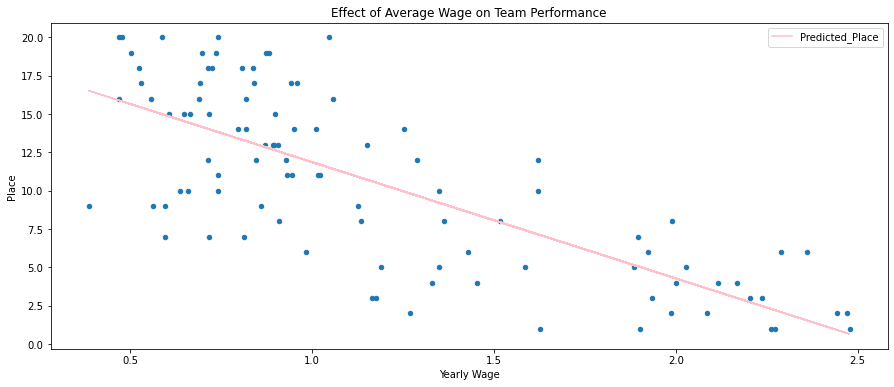

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
WP = Re1d.plot(ax=ax, kind="scatter", x="Yearly Wage", y="Place", title = "Effect of Average Wage on Team Performance", ylabel = "Place")
Re1d.plot(x="Yearly Wage", y="Predicted_Place", ax=ax, color = "pink")

As we can see, there's a clear downward trend in place for teams with higher average wages. Increasing the average wage of a team by a million pounds decreases place by more than 7.5 places on average. This demonstrates the importance of wages for how teams do in the league, as I explained in the introduction. That's why I want to see how wages change for domestic and international players.

#### 4) Plotting Average Wages for Foreign vs. Domestic Players for Each Team:

In [14]:
# For Foreign vs. Domestic
# I created separate datasets for each year so that it would be easier to show graphs for individual years.
# The code is the same except for the year each time. I also converted everything in millions.

FB1617F = FB1617[FB1617["Foreign"] == 1]
FB1617D = FB1617[FB1617["Foreign"] == 0]
mean1617F = FB1617F.groupby("Team")["Yearly Wage"].agg("mean")
mean1617D = FB1617D.groupby("Team")["Yearly Wage"].agg("mean")
mean1617F = mean1617F/1000000
mean1617D = mean1617D/1000000
FD1617 = pd.merge(mean1617F, mean1617D, on="Team")
FD1617.rename({'Yearly Wage_x': 'Avg Foreign Wage', 'Yearly Wage_y': 'Avg Domestic Wage'}, axis=1, inplace=True)

FB1718F = FB1718[FB1718["Foreign"] == 1]
FB1718D = FB1718[FB1718["Foreign"] == 0]
mean1718F = FB1718F.groupby("Team")["Yearly Wage"].agg("mean")
mean1718D = FB1718D.groupby("Team")["Yearly Wage"].agg("mean")
mean1718F = mean1718F/1000000
mean1718D = mean1718D/1000000
FD1718 = pd.merge(mean1718F, mean1718D, on="Team")
FD1718.rename({'Yearly Wage_x': 'Avg Foreign Wage', 'Yearly Wage_y': 'Avg Domestic Wage'}, axis=1, inplace=True)

FB1819F = FB1819[FB1819["Foreign"] == 1]
FB1819D = FB1819[FB1819["Foreign"] == 0]
mean1819F = FB1819F.groupby("Team")["Yearly Wage"].agg("mean")
mean1819D = FB1819D.groupby("Team")["Yearly Wage"].agg("mean")
mean1819F = mean1819F/1000000
mean1819D = mean1819D/1000000
FD1819 = pd.merge(mean1819F, mean1819D, on="Team")
FD1819.rename({'Yearly Wage_x': 'Avg Foreign Wage', 'Yearly Wage_y': 'Avg Domestic Wage'}, axis=1, inplace=True)

FB1920F = FB1920[FB1920["Foreign"] == 1]
FB1920D = FB1920[FB1920["Foreign"] == 0]
mean1920F = FB1920F.groupby("Team")["Yearly Wage"].agg("mean")
mean1920D = FB1920D.groupby("Team")["Yearly Wage"].agg("mean")
mean1920F = mean1920F/1000000
mean1920D = mean1920D/1000000
FD1920 = pd.merge(mean1920F, mean1920D, on="Team")
FD1920.rename({'Yearly Wage_x': 'Avg Foreign Wage', 'Yearly Wage_y': 'Avg Domestic Wage'}, axis=1, inplace=True)

FB2021F = FB2021[FB2021["Foreign"] == 1]
FB2021D = FB2021[FB2021["Foreign"] == 0]
mean2021F = FB2021F.groupby("Team")["Yearly Wage"].agg("mean")
mean2021D = FB2021D.groupby("Team")["Yearly Wage"].agg("mean")
mean2021F = mean2021F/1000000
mean2021D = mean2021D/1000000
FD2021 = pd.merge(mean2021F, mean2021D, on="Team")
FD2021.rename({'Yearly Wage_x': 'Avg Foreign Wage', 'Yearly Wage_y': 'Avg Domestic Wage'}, axis=1, inplace=True)

# Here's an example from 2020-2021:
mean2021F

Team
Arsenal                     2.990861
Aston Villa                 1.354354
Brighton and Hove Albion    0.857266
Burnley                     0.826317
Chelsea                     3.537245
Crystal Palace              2.104415
Everton                     3.189782
Fulham                      1.341330
Leeds United                0.967950
Leicester City              1.988211
Liverpool                   3.852436
Manchester City             3.965412
Manchester United           3.030942
Newcastle United            1.554293
Sheff Utd                   0.579651
Southampton                 0.873091
Tottenham Hotspur           2.896468
West Bromwich Albion        1.042492
West Ham United             1.686785
Wolverhampton Wanderers     1.428135
Name: Yearly Wage, dtype: float64

Damn Man City is rich. And also how is Everton paying its foreign players that much?

<AxesSubplot:title={'center':'2019-2020'}, ylabel='Average Wages (£ Millions)'>

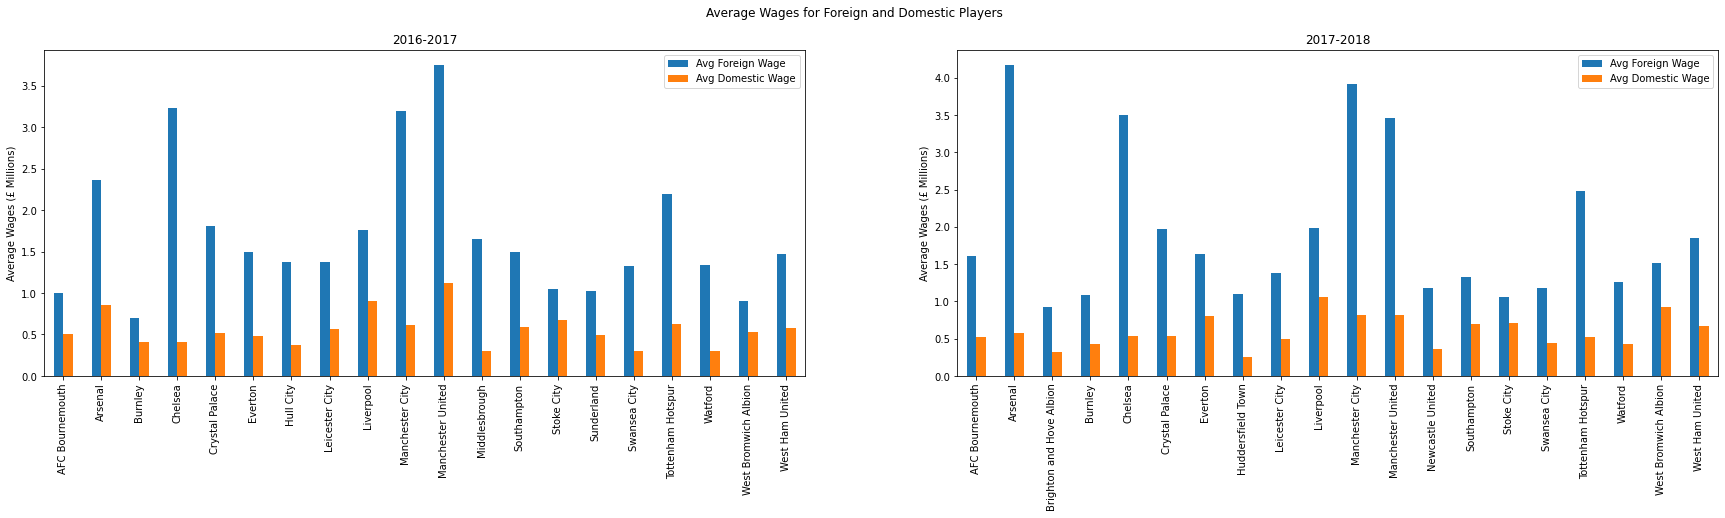

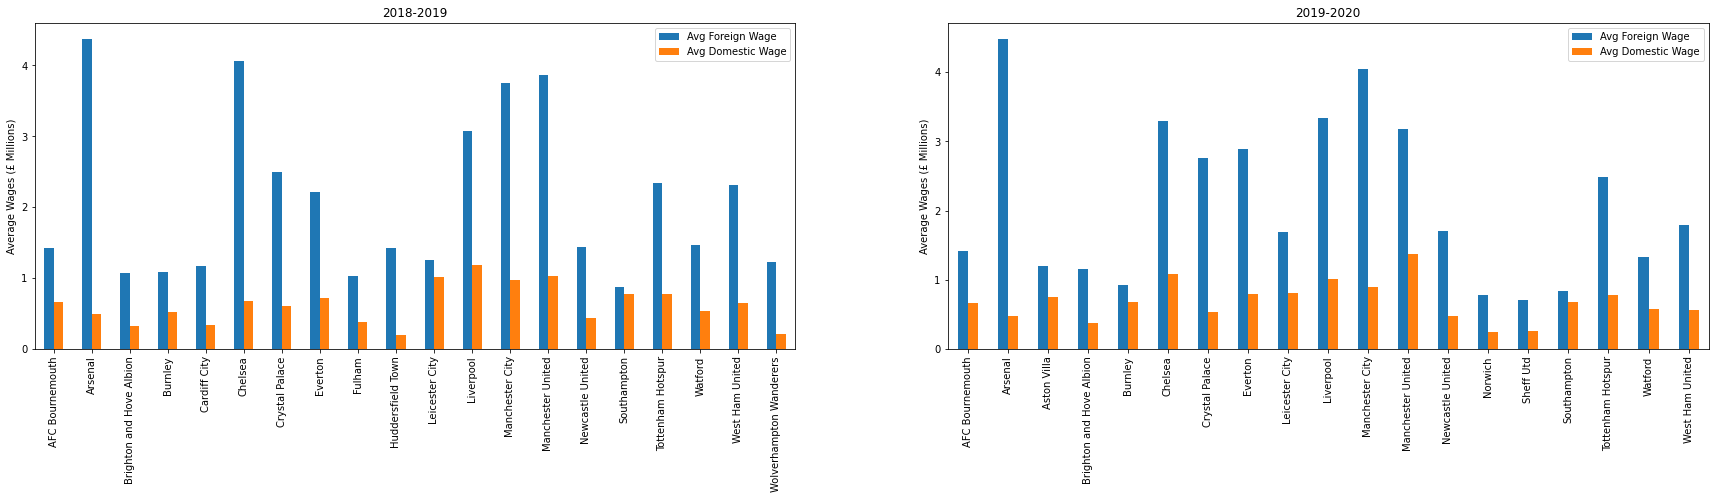

In [15]:
# Making the graphs:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(30, 6))
FD1617.plot.bar(title = "2016-2017", ylabel = "Average Wages (£ Millions)", xlabel = "", ax = ax[0])
FD1718.plot.bar(title = "2017-2018", ylabel = "Average Wages (£ Millions)", xlabel = "", ax = ax[1])
fig.suptitle("Average Wages for Foreign and Domestic Players")

fig, ax = plt.subplots(1, 2, figsize=(30, 6))
FD1819.plot.bar(title = "2018-2019", ylabel = "Average Wages (£ Millions)", xlabel = "", ax = ax[0])
FD1920.plot.bar(title = "2019-2020", ylabel = "Average Wages (£ Millions)", xlabel = "", ax = ax[1])

Now for a deep dive in 2020-2021:

<AxesSubplot:title={'center':'Average Foreign and Domestic Wages by Team, 2020-2021'}, ylabel='Average Wages (£ Millions)'>

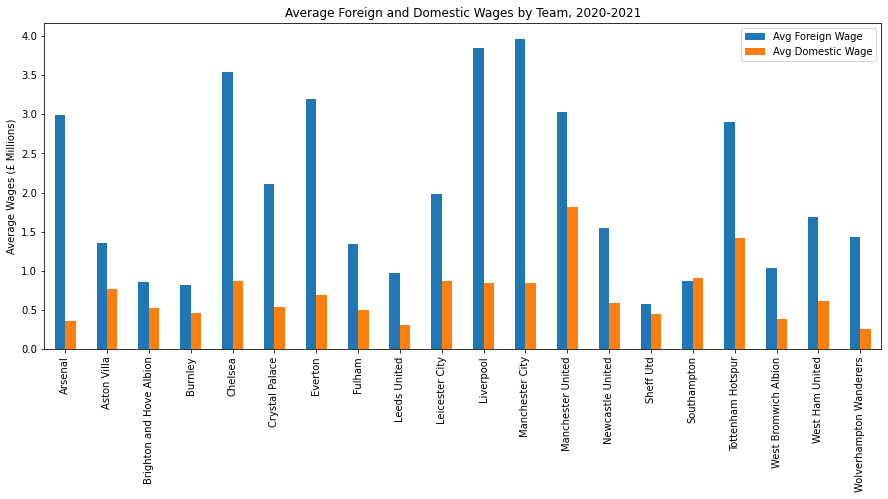

In [16]:
FD2021.plot.bar(title = "Average Foreign and Domestic Wages by Team, 2020-2021", ylabel = "Average Wages (£ Millions)", xlabel = "", figsize=(15, 6))

Here, it looks like average wages are heavily-dispersed across teams for both foreign and domestic players, but that the variance of domestic wages is much lower. Over the years, the teams with the highest average wages for each type of player remain around the same. We also notice that average domestic wages are a fraction of average foreign player wages for almost all teams (not Southampton). This suggests that teams compete most over foreign players since they spend a much larger per-person sum on each foreign player, and the teams with the most money are capable of spending the largest such sums. Looking at the 2020-21 data we see this especially clearly:

Average wage of a domestic player:

In [17]:
(FB2021D["Yearly Wage"].mean())/1000000

0.685783129032258

Average wage of a foreign player:

In [18]:
(FB2021F["Yearly Wage"].mean())/1000000

2.136931315895372

Ratio:

In [19]:
(FB2021D["Yearly Wage"].mean()/1000000)/((FB2021F["Yearly Wage"].mean())/1000000)

0.3209195934053292

So as we can see, international players have an average wage of £2.14m over all teams while domestic players only got about £686,000, which is around 32% of the average international player wage over all teams.

#### 5) Box and Whiskers:

Let's also find out how wages are dispersed for different teams for foreign and domestic players. To do this, I want to create box-and-whisker plots of wages for each team, separately for foreign and domestic players. I found a function that does this from a past project on the premier league looking at win-loss rates for different teams, and I thought using it on wage data would be helpful to understand the distribution of wages for foreign and domestic players in my data. This is from the project "How well do FIFA ratings predict actual results?" written by Shahzoor Safdar and published in May 2019 (Safdar, 2019).

In [20]:
def make_boxplot(df, xlabel, ylabel, ax, point_size =3, point_color='darkgrey', box_pal="Blues"):
    """Make a boxplot given a dataset and two variables to focus on. The ylabel
    must be categorical (I'm using teams). 
    
    :param DataFrame df: Dataframe, must have categorical and numeric data.
    :param str xlabel: Label of column with numeric data, must match df.
    :param str ylabel: Label of column with categorical data, must match df.
    :param axes ax: Axis object from mpl. 
    :param dict box_pal: A custome color palette for the box plots.
    :return: The original axis object with the plot imposed on it.
    :rtype: axes
    
    """

    # make box plot for each category/club
    ax = sns.boxplot(y = ylabel, x = xlabel, data = df, whis=np.inf, ax= ax, palette=box_pal, width=0.3)
    
    # remove the top and right line in graph
    sns.despine()
    
    # set size
    ax.figure.set_size_inches(20,14)
    
    # set labels
    ax.set_xlabel((xlabel.lower()).capitalize())
    ax.set_ylabel((ylabel.lower()).capitalize())
    ax.grid(False)
    
    return ax


I will only do this for the 2020-2021 season because I do not think it adds much to make two such graphs for each year and because it's really complicated. Like Mr. Safdar, I'll colour-code the teams in this graph according to what type of team they are: whether they are part of the so-called "big six" (the best teams in the league, which never get relegated and most often win the title—Arsenal, Chelsea, Liverpool, Manchester City, Manchester United, and Tottenham Hotspur), the teams that were promoted to the Premier League for that season (Fulham, Leeds United, and West Bromwich Albion), and the teams that were relegated (Fulham, Sheffield United, and West Bromwich Albion). Because in this season Fulham and WBA were both promoted and ended up being relegated, I'll give these a separate color as well.

In [21]:
# Recall FB2021F and FB2021D, which are the player datasets I used that were filtered by Foreign:
# Here I'm making datasets where I only have Team Names and wages so it's easier to fit into the function.

# For Foreign:
FB2021FQ = FB2021F.drop(["Name"], axis = 1)
FB2021FQ = FB2021FQ.drop(["League"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Age"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Country"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Weekly Wage"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Season"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Place"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Start-Promoted"], axis = 1)
FB2021FQ = FB2021FQ.drop(["End-Relegated"], axis = 1)
FB2021FQ = FB2021FQ.drop(["Foreign"], axis = 1)

# For Domestic:

FB2021DQ = FB2021D.drop(["Name"], axis = 1)
FB2021DQ = FB2021DQ.drop(["League"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Age"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Country"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Weekly Wage"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Season"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Place"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Start-Promoted"], axis = 1)
FB2021DQ = FB2021DQ.drop(["End-Relegated"], axis = 1)
FB2021DQ = FB2021DQ.drop(["Foreign"], axis = 1)
FB2021DQ

,Team,Yearly Wage
3,Leeds United,1300000
5,Leeds United,1820000
8,Leeds United,2080000
9,Leeds United,1768000
10,Leeds United,1196000
...,...,...
1353,Manchester United,7540
1355,Manchester United,43160
1357,Manchester United,7540
1358,Manchester United,7540


Text(0.5, 1.0, 'Player Yearly Wage Boxplot by Team for Foreign Players (£10 m)')

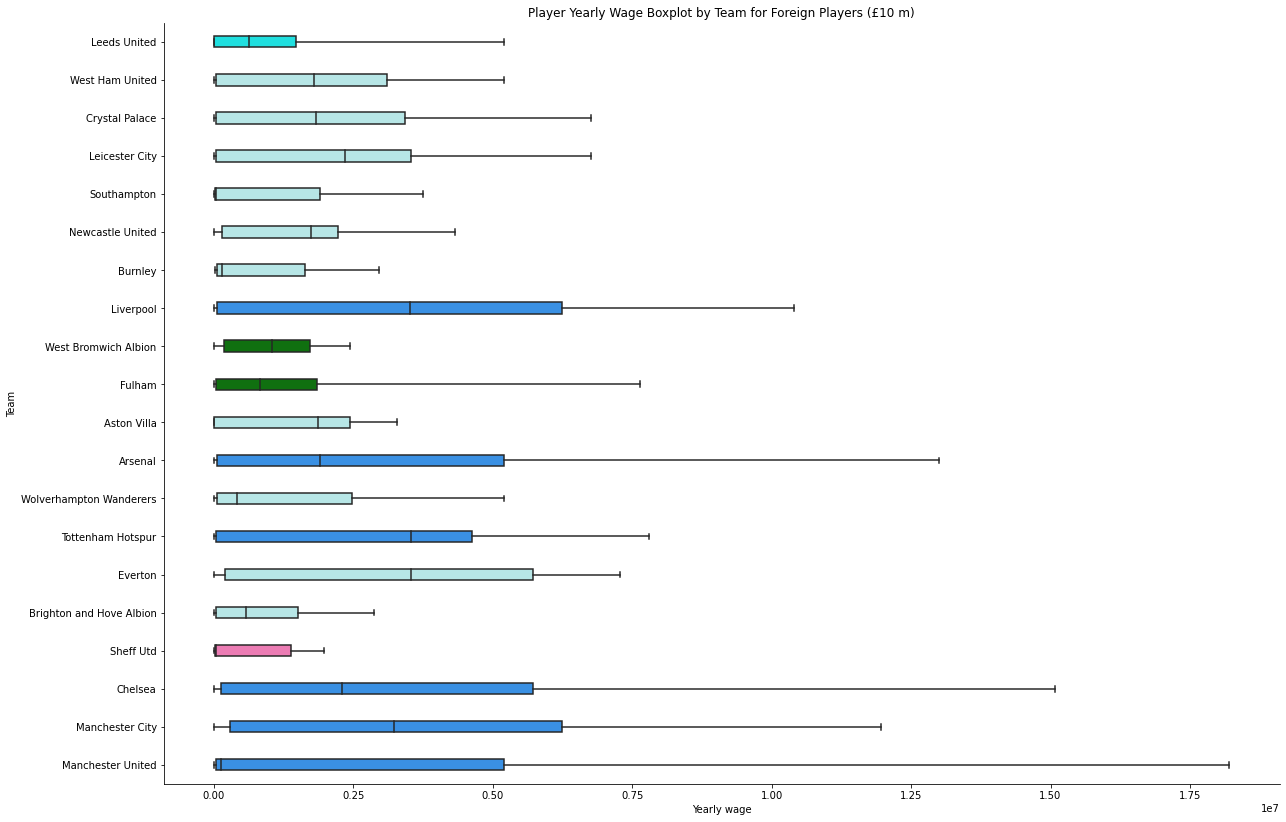

In [22]:
# Shahzoor also uses a dictionary to color-code the teams, as explained above, so here's the dictionary taylored to my data.

big_six = ["Arsenal", "Liverpool", "Chelsea", "Tottenham Hotspur", "Manchester United", "Manchester City"]
promoted = ["Leeds United"]
relegated = ["Sheff Utd"]
promoted_and_relegated = ["Fulham", "West Bromwich Albion"]

my_pal1 = {Team: "dodgerblue" if Team in big_six else "hotpink" if Team in relegated else "aqua" if Team in promoted else "green" if Team in promoted_and_relegated else "paleturquoise"  for Team in FB2021FQ.Team.unique()}

# For the Foreign Plot:
ax_players = plt.subplot()
ax_players = make_boxplot(FB2021FQ,"Yearly Wage","Team",ax_players,box_pal=my_pal1)
ax_players.set_title("Player Yearly Wage Boxplot by Team for Foreign Players (£10 m)")

As we can see, there's a lot of variation in wages for players between teams and within teams. For a lot of the teams, the lower half of players is similar with a median of around 2,500,000 although this rises to 5,000,000 for Manchester United and is very very small for teams like Burnley and Brighton. However, the earnings of top earners within a team vary strongly across teams, with top earners in the Big Six making much much more than those in other teams. The spread of wages also varies a lot, with teams like West Brom and Brighton having much less dispersed wages than some of the big six. I think these trends may come from the fact that the big six have access to much more money than other teams and are able to get some really, really good foreign players that simply demand much higher wages while the other teams must make due with more average players who can only demand so much money. What's also interesting is the large amount of players making extremely small wages. I think this may be due to the datasets including some trainees making very little money.

Text(0.5, 1.0, 'Player Yearly Wage Boxplot by Team for Domestic Players (£10 m)')

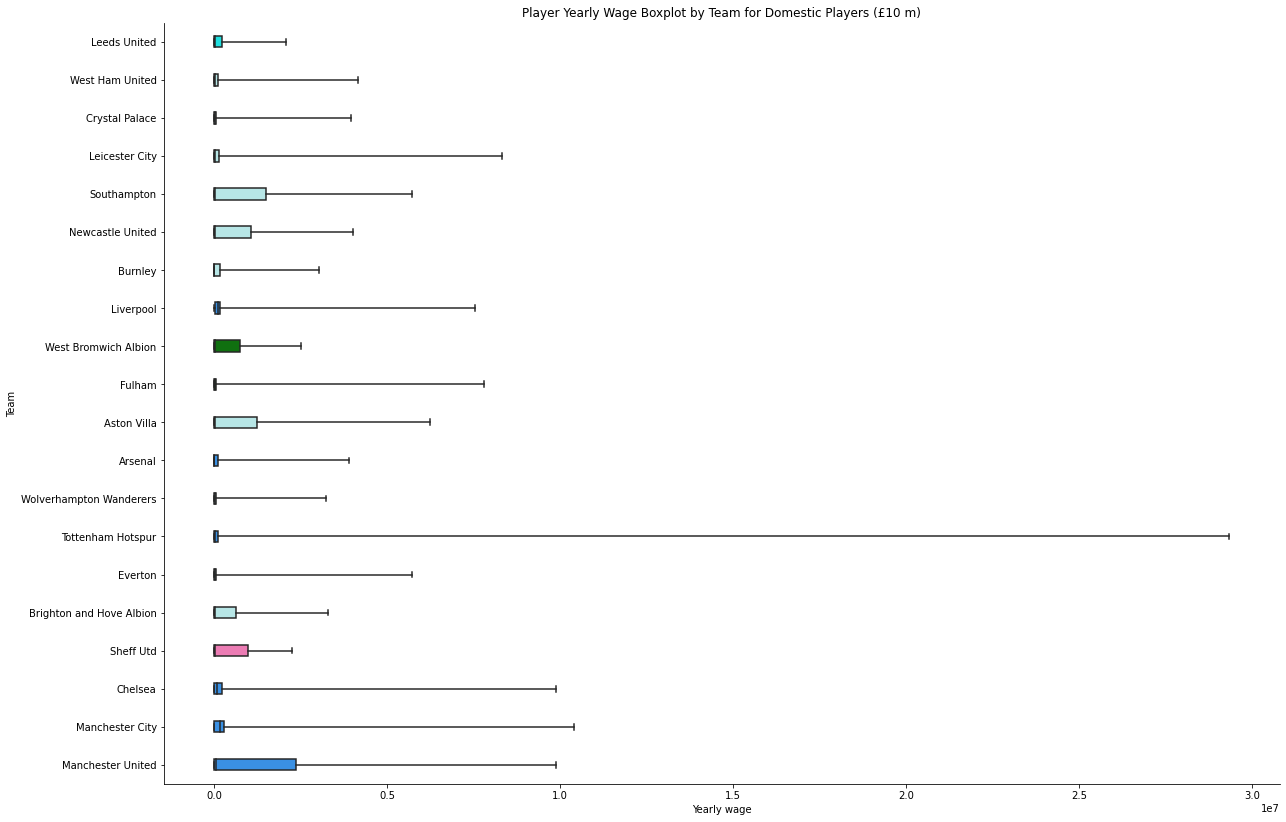

In [23]:
# For the Domestic Plot:

ax_players = plt.subplot()
ax_players = make_boxplot(FB2021DQ,"Yearly Wage","Team",ax_players,box_pal=my_pal1)
ax_players.set_title("Player Yearly Wage Boxplot by Team for Domestic Players (£10 m)")

This is interesting because the wages are so much more centered around zero for domestic players, with only the top 25% of domestic players in all the teams earning any real money. This result validates my idea about the trainees since there are far more domestic trainees in football teams than foreigners due to how most players start out in teams located within their own country. We can also see that there's a lot of variation in the earnings of each team's highest earners, although not as much as for foreign players.

In [24]:
# Now, I'm going to overlay these two graphs on top of each other by creating a new dataset combining the previous two:

FB2021FQ["Team_New"] = FB2021FQ["Team"] + " (Foreign)"
FB2021DQ["Team_New"] = FB2021DQ["Team"] + " (Domestic)"
MMM = pd.concat([FB2021FQ, FB2021DQ], axis = 0)
MMM1 = MMM.drop(["Team"], axis = 1)
MMM2 = MMM1.sort_values("Team_New")
MMM2

,Yearly Wage,Team_New
834,7540,Arsenal (Domestic)
793,51948,Arsenal (Domestic)
789,119600,Arsenal (Domestic)
788,1976000,Arsenal (Domestic)
786,2704000,Arsenal (Domestic)
...,...,...
838,5200000,Wolverhampton Wanderers (Foreign)
839,5200000,Wolverhampton Wanderers (Foreign)
840,4368000,Wolverhampton Wanderers (Foreign)
871,98800,Wolverhampton Wanderers (Foreign)


In [25]:
# Create a new palette:

big_six1 = ["Arsenal (Foreign)", "Arsenal (Domestic)", "Liverpool (Foreign)", "Liverpool (Domestic)", "Chelsea (Foreign)", "Chelsea (Domestic)", "Tottenham Hotspur (Foreign)", "Tottenham Hotspur (Domestic)", "Manchester United (Foreign)", "Manchester United (Domestic)", "Manchester City (Foreign)", "Manchester City (Domestic)"]
promoted1 = ["Leeds United (Foreign)", "Leeds United (Domestic)"]
relegated1 = ["Sheff United (Foreign)", "Sheff Utd (Domestic)"]
promoted_and_relegated1 = ["Fulham (Foreign)", "Fulham (Domestic)", "West Bromwich Albion (Foreign)", "West Bromwich Albion (Domestic)"]

my_pal3 = {Team_New: "yellow" if Team_New in big_six1 else "purple" if Team_New in relegated1 else "red" if Team_New in promoted1 else "orange" if Team_New in promoted_and_relegated1 else "paleturquoise"  for Team_New in MMM.Team_New.unique()}

In [26]:
# Make the plot bigger so it's easier to see with more boxes and whiskers:

def make_boxplotbig(df, xlabel, ylabel, ax, point_size =3, point_color='darkgrey', box_pal="Blues"):
    """Make a boxplot given a dataset and two variables to focus on. The ylabel
    must be categorical (I'm using teams). 
    
    :param DataFrame df: Dataframe, must have categorical and numeric data.
    :param str xlabel: Label of column with numeric data, must match df.
    :param str ylabel: Label of column with categorical data, must match df.
    :param axes ax: Axis object from mpl. 
    :param dict box_pal: A custome color palette for the box plots.
    :return: The original axis object with the plot imposed on it.
    :rtype: axes
    
    """

    # make box plot for each category/club
    ax = sns.boxplot(y = ylabel, x = xlabel, data = df, whis=np.inf, ax= ax, palette=box_pal, width=0.3)
    
    # remove the top and right line in graph
    sns.despine()
    
    # set size
    ax.figure.set_size_inches(20,28)
    
    # set labels
    ax.set_xlabel((xlabel.lower()).capitalize())
    ax.set_ylabel((ylabel.lower()).capitalize())
    ax.grid(False)
    
    return ax

Text(0.5, 1.0, 'Player Yearly Wage Boxplot by Team (£10 m)')

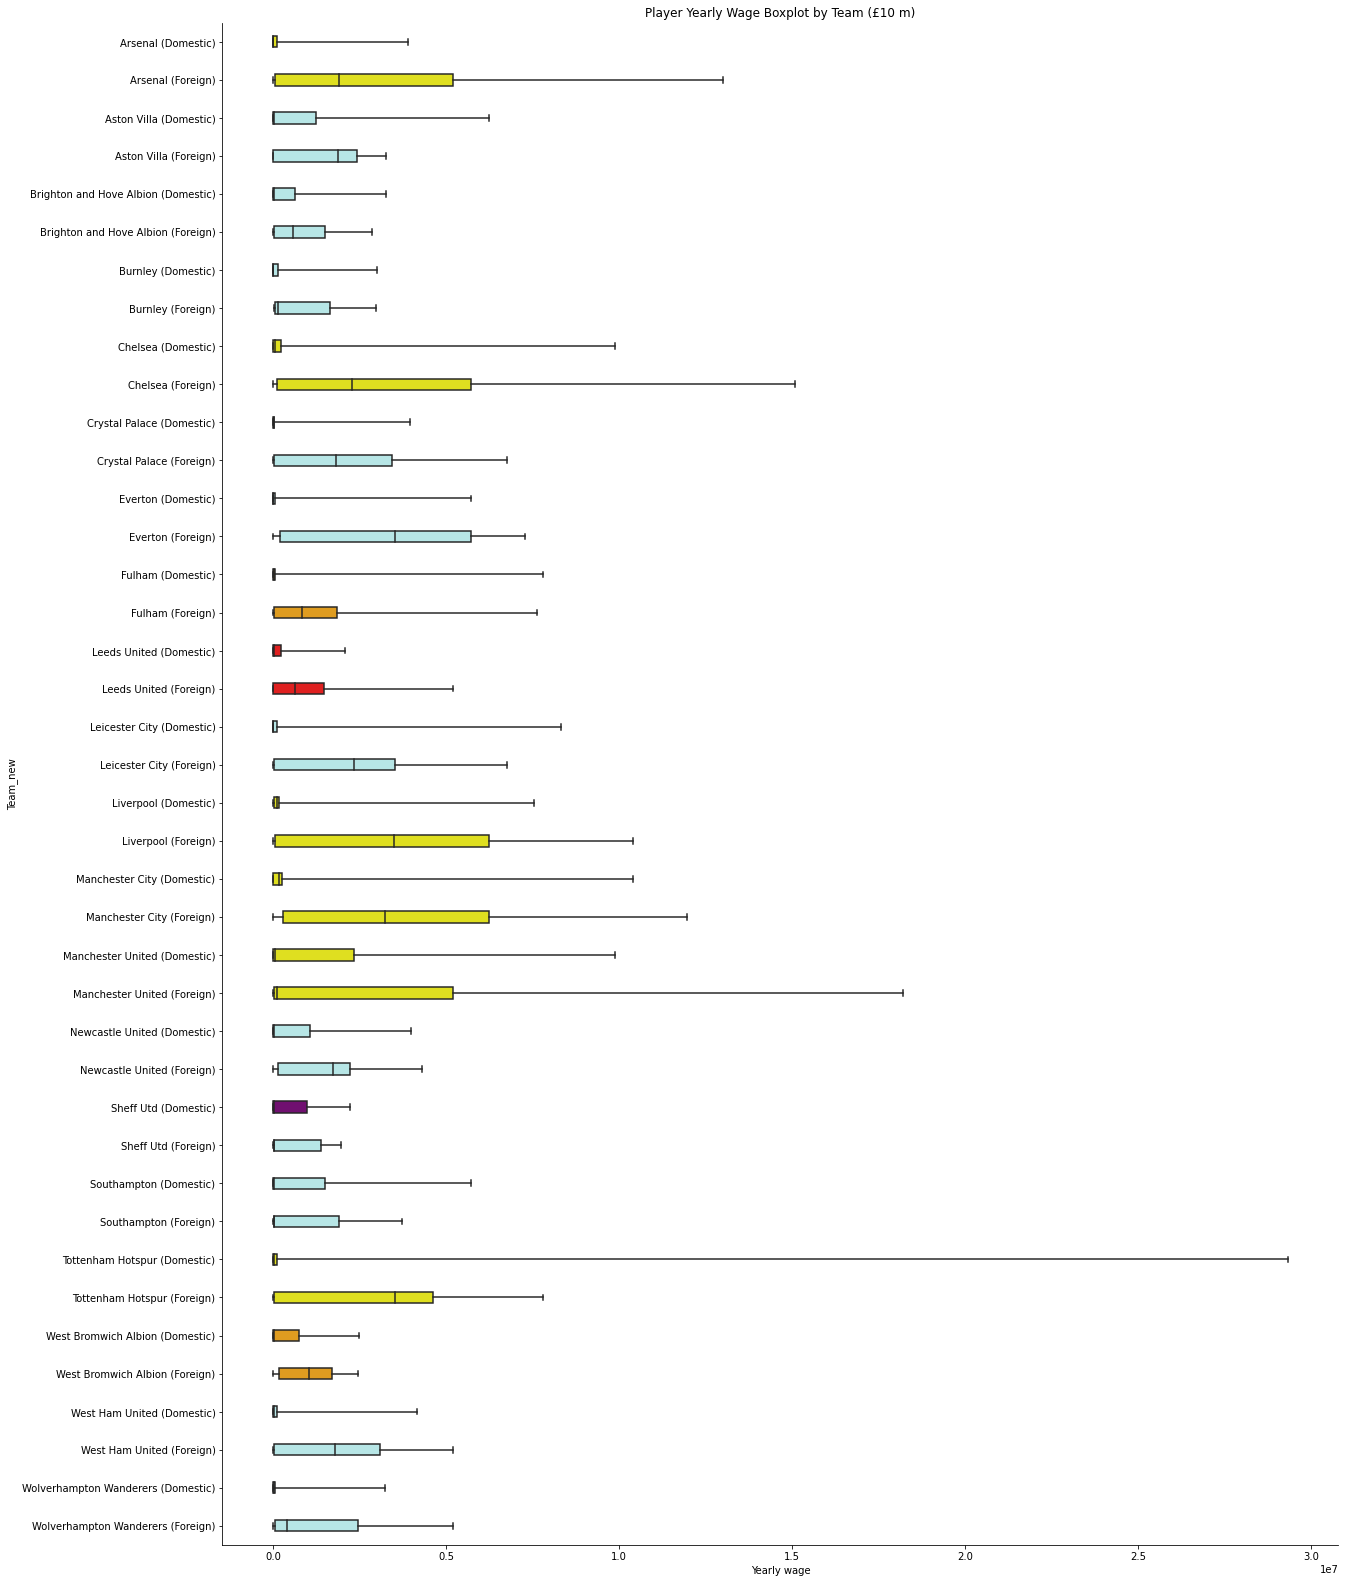

In [27]:
# Let's go!

ax_players = plt.subplot()
make_boxplotbig(MMM2,"Yearly Wage","Team_New",ax_players,box_pal=my_pal3)
ax_players.set_title("Player Yearly Wage Boxplot by Team (£10 m)")

Here the differences between foreign and domestic players are more apparent. Most teams have the highest earning foreign players earning less money than the highest-earning domestic player, and wages are a lot more skewed around zero for domestic players in all teams. However, what's apparent here is that the top 25th percentile is much higher than the 75% of wages below it for all teams.

#### 6) Time-Series:

I also want to see how these wages evolved over time, so let's create a time-series chart of all these averages over each season:

In [28]:
# Create season variables to show time variation:

FD1617["Season"] = "2016-2017"
FD1718["Season"] = "2017-2018"
FD1819["Season"] = "2018-2019"
FD1920["Season"] = "2019-2020"
FD2021["Season"] = "2020-2021"

In [29]:
# Manipulate the data a bit:

FD1617D = FD1617.reset_index()
FD1718D = FD1718.reset_index()
FD1819D = FD1819.reset_index()
FD1920D = FD1920.reset_index()
FD2021D = FD2021.reset_index()

FD1617T = FD1617D.set_index("Season")
FD1718T = FD1718D.set_index("Season")
FD1819T = FD1819D.set_index("Season")
FD1920T = FD1920D.set_index("Season")
FD2021T = FD2021D.set_index("Season")


In [30]:
FDT = pd.concat([FD1617T, FD1718T])
FDTT = pd.concat([FDT, FD1819T])
FDTTT = pd.concat([FDTT, FD1920T])
FDTTTT = pd.concat([FDTTT, FD2021T])
FDTTTT

,Team,Avg Foreign Wage,Avg Domestic Wage
Season,,,
2016-2017,AFC Bournemouth,0.999492,0.510087
2016-2017,Arsenal,2.361505,0.856345
2016-2017,Burnley,0.701567,0.403266
2016-2017,Chelsea,3.229000,0.403153
2016-2017,Crystal Palace,1.812525,0.521235
...,...,...,...
2020-2021,Southampton,0.873091,0.911820
2020-2021,Tottenham Hotspur,2.896468,1.416468
2020-2021,West Bromwich Albion,1.042492,0.387823


In [31]:
FDQ = FDTTTT.reset_index()
FDQQ = FDQ.set_index(["Team", "Season"])
FZQ = FDQQ.unstack()
FZQQ = FZQ.transpose()
FZQQQ = FZQQ.reset_index()
PDC = FZQQQ.set_index(["level_0"])
PDC

Team,Season,AFC Bournemouth,Arsenal,Aston Villa,Brighton and Hove Albion,Burnley,Cardiff City,Chelsea,Crystal Palace,Everton,...,Sheff Utd,Southampton,Stoke City,Sunderland,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wolverhampton Wanderers
level_0,,,,,,,,,,,,,,,,,,,,,
Avg Foreign Wage,2016-2017,0.999492,2.361505,NaN,NaN,0.701567,NaN,3.229000,1.812525,1.496430,...,NaN,1.489010,1.050215,1.021107,1.319843,2.191008,1.339019,0.905381,1.468536,NaN
Avg Foreign Wage,2017-2018,1.610440,4.166067,NaN,0.923179,1.079975,NaN,3.503760,1.968358,1.632632,...,NaN,1.323561,1.051960,NaN,1.180960,2.482504,1.258957,1.517160,1.855100,NaN
Avg Foreign Wage,2018-2019,1.432167,4.378000,NaN,1.082221,1.092797,1.167809,4.056502,2.493573,2.223036,...,NaN,0.884900,NaN,NaN,NaN,2.344974,1.474744,NaN,2.322171,1.236828
Avg Foreign Wage,2019-2020,1.417217,4.484299,1.197260,1.152281,0.933289,NaN,3.297410,2.759968,2.890615,...,0.711329,0.837366,NaN,NaN,NaN,2.484685,1.333883,NaN,1.791708,NaN
Avg Foreign Wage,2020-2021,NaN,2.990861,1.354354,0.857266,0.826317,NaN,3.537245,2.104415,3.189782,...,0.579651,0.873091,NaN,NaN,NaN,2.896468,NaN,1.042492,1.686785,1.428135
Avg Domestic Wage,2016-2017,0.510087,0.856345,NaN,NaN,0.403266,NaN,0.403153,0.521235,0.486283,...,NaN,0.589206,0.678977,0.493511,0.301900,0.625183,0.300290,0.532299,0.576717,NaN
Avg Domestic Wage,2017-2018,0.520102,0.576537,NaN,0.320112,0.431854,NaN,0.538258,0.538788,0.807084,...,NaN,0.695656,0.704981,NaN,0.446564,0.521099,0.427603,0.921334,0.668063,NaN
Avg Domestic Wage,2018-2019,0.660151,0.502450,NaN,0.324039,0.523669,0.337870,0.683861,0.603622,0.722053,...,NaN,0.779220,NaN,NaN,NaN,0.785212,0.544655,NaN,0.648387,0.210681
Avg Domestic Wage,2019-2020,0.673892,0.480097,0.759590,0.381918,0.686952,NaN,1.079835,0.535652,0.795979,...,0.268353,0.686870,NaN,NaN,NaN,0.784934,0.580720,NaN,0.561535,NaN


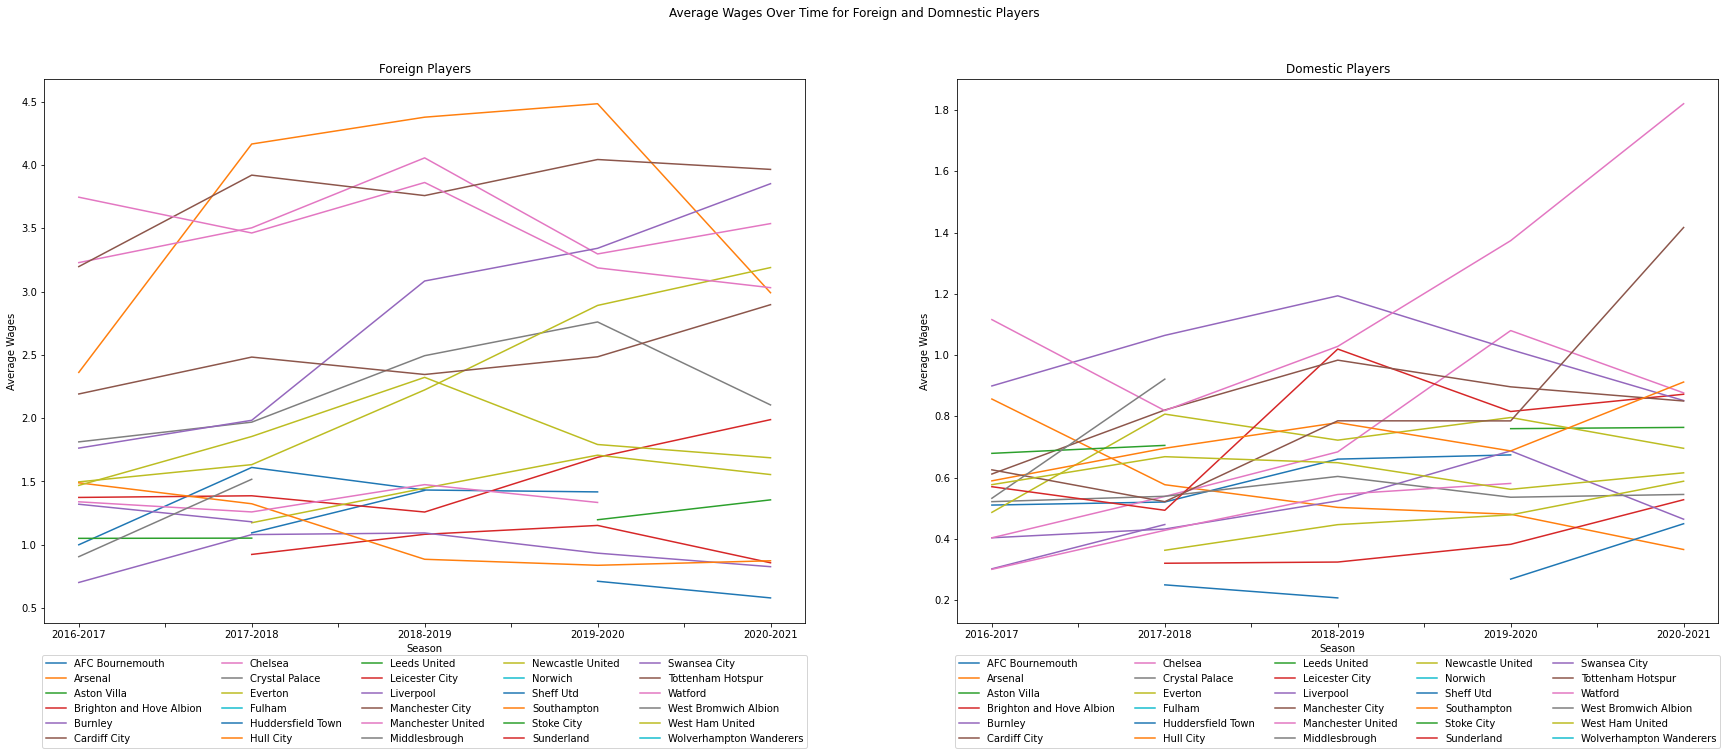

In [32]:
PDCQ = PDC.reset_index()
PDCQF = PDCQ[PDCQ["level_0"]=="Avg Foreign Wage"]
PDCQD = PDCQ[PDCQ["level_0"]=="Avg Domestic Wage"]
DF1 = PDCQF.set_index(["Season"])
DF2 = PDCQD.set_index(["Season"])

DF11 = DF1.drop(["level_0"], axis = 1)
DF22 = DF2.drop(["level_0"], axis = 1)

# There we go:

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
PLT11 = DF11.plot(title = "Foreign Players", ylabel = "Average Wages", ax = ax[0])
PLT22 = DF22.plot(title = "Domestic Players", ylabel = "Average Wages", ax = ax[1])
fig.suptitle("Average Wages Over Time for Foreign and Domnestic Players")

PLT11.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
PLT22.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)

Although it is somewhat difficult to distinguish individual teams here and the graphs are on different scales, we can clearly see that wages vary a lot over time per team but that there has not been a clear general trend. Moreover, although domestic wages remain constistently lower than foreign wages, the average difference between foreign and domestic does not move much over time since team wages don't really change much overall. We can also see that the wages for foreign players are somewhat lower for teams that are relegation-prone (these appear as lines that are interrupted in the graphs since there is no data for when these teams are in the Championship), but that this trend is more muted for domestic players.

#### 7) Ratios:

Now let's explore this further: how did the relationship between domestic wages and foreign wages vary by team, and how did it change over time? For this, I need to create plots of the ratio of domestic to foreign wages for each year and then one of how these ratios changed over the seasons.

<AxesSubplot:title={'center':'2017-2018'}, ylabel='Ratio'>

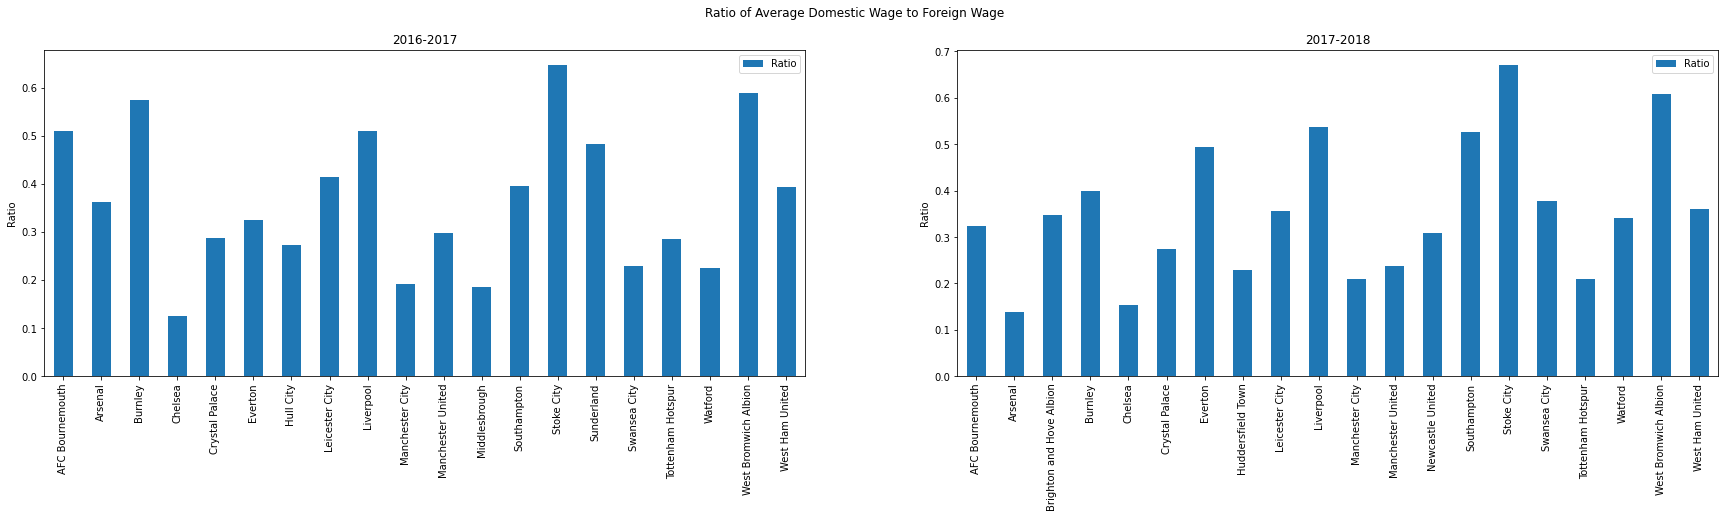

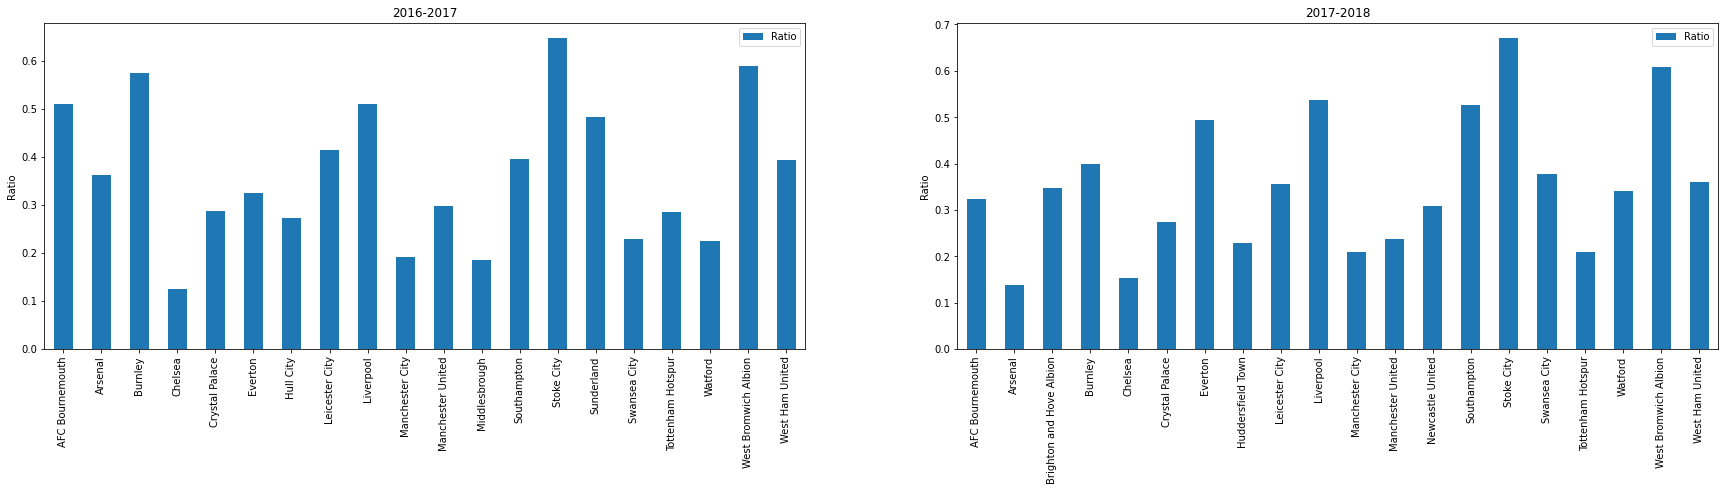

In [33]:
FD1617["Ratio"] = FD1617["Avg Domestic Wage"]/FD1617["Avg Foreign Wage"]
FD1718["Ratio"] = FD1718["Avg Domestic Wage"]/FD1718["Avg Foreign Wage"]
FD1819["Ratio"] = FD1819["Avg Domestic Wage"]/FD1819["Avg Foreign Wage"]
FD1920["Ratio"] = FD1920["Avg Domestic Wage"]/FD1920["Avg Foreign Wage"]
FD2021["Ratio"] = FD2021["Avg Domestic Wage"]/FD2021["Avg Foreign Wage"]

R1617 = FD1617.drop(["Avg Domestic Wage"], axis = 1)
RR1617 = R1617.drop(["Avg Foreign Wage"], axis = 1)
RRR1617 = RR1617.drop(["Season"], axis = 1)

R1718 = FD1718.drop(["Avg Domestic Wage"], axis = 1)
RR1718 = R1718.drop(["Avg Foreign Wage"], axis = 1)
RRR1718 = RR1718.drop(["Season"], axis = 1)

R1819 = FD1819.drop(["Avg Domestic Wage"], axis = 1)
RR1819 = R1819.drop(["Avg Foreign Wage"], axis = 1)
RRR1819 = RR1819.drop(["Season"], axis = 1)

R1920 = FD1920.drop(["Avg Domestic Wage"], axis = 1)
RR1920 = R1920.drop(["Avg Foreign Wage"], axis = 1)
RRR1920 = RR1920.drop(["Season"], axis = 1)

R2021 = FD2021.drop(["Avg Domestic Wage"], axis = 1)
RR2021 = R2021.drop(["Avg Foreign Wage"], axis = 1)
RRR2021 = RR2021.drop(["Season"], axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(30, 6))
RRR1617.plot.bar(title = "2016-2017", ylabel = "Ratio", xlabel = "", ax = ax[0])
RRR1718.plot.bar(title = "2017-2018", ylabel = "Ratio", xlabel = "", ax = ax[1])
fig.suptitle("Ratio of Average Domestic Wage to Foreign Wage")

fig, ax = plt.subplots(1, 2, figsize=(30, 6))
RRR1617.plot.bar(title = "2016-2017", ylabel = "Ratio", xlabel = "", ax = ax[0])
RRR1718.plot.bar(title = "2017-2018", ylabel = "Ratio", xlabel = "", ax = ax[1])

Now for another deep dive into 2019-2021:

<AxesSubplot:title={'center':'Ratio of Average Domestic Wage to Foreign Wage, 2020-2021'}, ylabel='Ratio'>

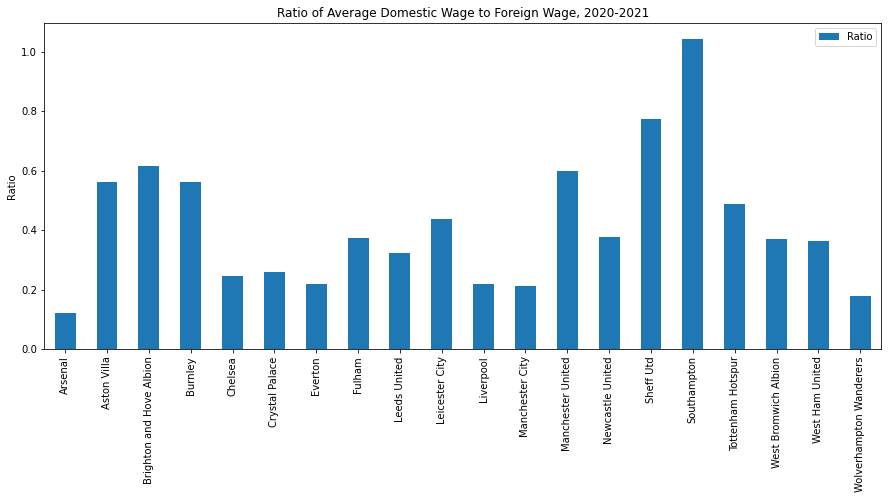

In [34]:
RRR2021.plot.bar(title = "Ratio of Average Domestic Wage to Foreign Wage, 2020-2021", ylabel = "Ratio", xlabel = "", figsize=(15, 6))

As we can see, most teams see their domestic players earning far less than foreign players on average, with the smallest ratio being for Arsenal and Wolverhampton at around 10-15%. One clear exception is Southampton, the only team where the ratio is above one. By inspection, it doesn't look like there is any pattern in which teams have higher ratios. The data is also well dispersed:

In [35]:
RQRS = RRR2021.reset_index()
Mean = RQRS["Ratio"].mean()
StDev = RQRS["Ratio"].std()

print(f"The average ratio is {Mean} with standard deviation {StDev}")

The average ratio is 0.4180132523070778 with standard deviation 0.22662706660034773


Now let's plot the same data over time:

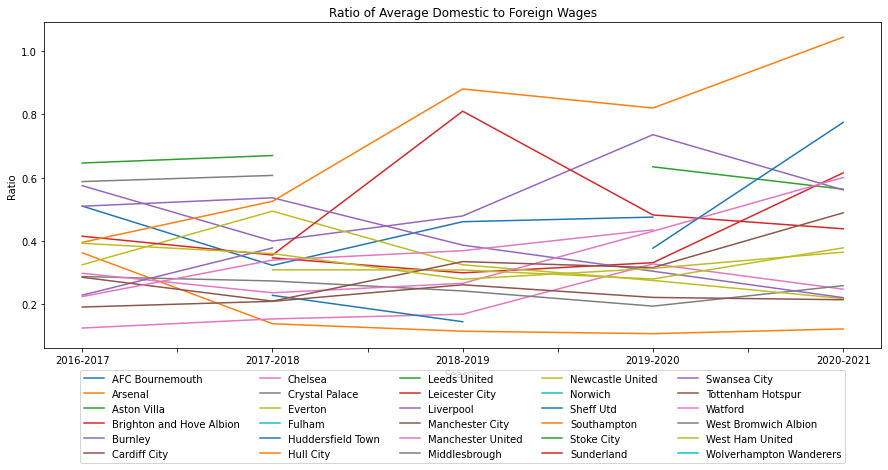

In [36]:
FDTTTT["Domestic Wage Over Foreign"] = FDTTTT["Avg Domestic Wage"]/FDTTTT["Avg Foreign Wage"]
FDTTTT
ZTE = FDTTTT.reset_index()
ZTE = ZTE.drop(["Avg Foreign Wage"], axis = 1)
ZTE = ZTE.drop(["Avg Domestic Wage"], axis = 1)
ZTEE = ZTE.set_index(["Team", "Season"])
ZTEEE = ZTEE.unstack()
ZT4E = ZTEEE.transpose()
ZT5E = ZT4E.reset_index()
ZT6E = ZT5E.drop(["level_0"], axis = 1)
ZT7E = ZT6E.set_index(["Season"])

fig, ax = plt.subplots(figsize=(15, 6))
PP = ZT7E.plot(ax=ax, title = "Ratio of Average Domestic to Foreign Wages", ylabel = "Ratio")
PP.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)

Here, it looks as though there hasn't been much variation in ratios over time for most teams. Although some have seen their ratio decline (like Arsenal), and some increase (like Southampton), most have not changed much. And there's also not much of a difference between relegation-prone teams and those not prone. This means the difference between domestic and foreign wages is a pretty set trend in the league system.

#### 8) Do Foreign Players Affect Domestic Wages?

Finally, let's see if these disparities and trends highlighted above have an effect on each-other. In other words, does having more foreign players actually affect how much domestic players make? To answer this question, I'll regress the average wage of domestic players on the percentage of a team that is foreign.

In [37]:
#Recall my OG slight-processed Dataset:

FB1617

,Name,Team,League,Age,Country,Weekly Wage,Yearly Wage,Season,Place,Start-Promoted,End-Relegated,Foreign
0,Rhoys Wiggins,AFC Bournemouth,Premier League,28,Wales,14000,728000,2016-17,9,0,0,0
1,Ben Cooper,AFC Bournemouth,Premier League,20,England,100,5200,2016-17,9,0,0,0
2,Tyrone Mings,AFC Bournemouth,Premier League,27,England,15000,780000,2016-17,9,0,0,0
3,Aaron Ramsdale,AFC Bournemouth,Premier League,22,England,3500,182000,2016-17,9,0,0,0
4,Steve Cook,AFC Bournemouth,Premier League,29,England,22000,1144000,2016-17,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Kyle Jameson,Chelsea,Premier League,21,England,1000,52000,2016-17,1,0,0,0
1254,George McEachran,Chelsea,Premier League,19,England,100,5200,2016-17,1,0,0,0
1255,Tariq Uwakwe,Chelsea,Premier League,20,England,100,5200,2016-17,1,0,0,0
1256,Jacob Maddox,Chelsea,Premier League,21,England,2100,109200,2016-17,1,0,0,0


In [38]:
VV1617 = FB1617.groupby("Team")["Foreign"].agg("sum")
VV1718 = FB1718.groupby("Team")["Foreign"].agg("sum")
VV1819 = FB1819.groupby("Team")["Foreign"].agg("sum")
VV1920 = FB1920.groupby("Team")["Foreign"].agg("sum")
VV2021 = FB2021.groupby("Team")["Foreign"].agg("sum")
VV2021

Team
Arsenal                     32
Aston Villa                 18
Brighton and Hove Albion    34
Burnley                     14
Chelsea                     33
Crystal Palace              23
Everton                     23
Fulham                      27
Leeds United                26
Leicester City              29
Liverpool                   26
Manchester City             29
Manchester United           34
Newcastle United            20
Sheff Utd                   14
Southampton                 23
Tottenham Hotspur           23
West Bromwich Albion        12
West Ham United             22
Wolverhampton Wanderers     35
Name: Foreign, dtype: int64

In [39]:
XX1617 = FB1617.groupby("Team")["Foreign"].agg("count")
XX1718 = FB1718.groupby("Team")["Foreign"].agg("count")
XX1819 = FB1819.groupby("Team")["Foreign"].agg("count")
XX1920 = FB1920.groupby("Team")["Foreign"].agg("count")
XX2021 = FB2021.groupby("Team")["Foreign"].agg("count")
XX2021

Team
Arsenal                     73
Aston Villa                 63
Brighton and Hove Albion    69
Burnley                     77
Chelsea                     68
Crystal Palace              77
Everton                     62
Fulham                      67
Leeds United                68
Leicester City              68
Liverpool                   72
Manchester City             64
Manchester United           66
Newcastle United            75
Sheff Utd                   64
Southampton                 66
Tottenham Hotspur           71
West Bromwich Albion        68
West Ham United             64
Wolverhampton Wanderers     63
Name: Foreign, dtype: int64

In [40]:
XXX1617 = pd.merge(VV1617, XX1617, on="Team")
XXX1718 = pd.merge(VV1718, XX1718, on="Team")
XXX1819 = pd.merge(VV1819, XX1819, on="Team")
XXX1920 = pd.merge(VV1920, XX1920, on="Team")
XXX2021 = pd.merge(VV2021, XX2021, on="Team")

XXX1617["% Foreign"] = (XXX1617["Foreign_x"]/XXX1617["Foreign_y"])*100
XXX1718["% Foreign"] = (XXX1718["Foreign_x"]/XXX1718["Foreign_y"])*100
XXX1819["% Foreign"] = (XXX1819["Foreign_x"]/XXX1819["Foreign_y"])*100
XXX1920["% Foreign"] = (XXX1920["Foreign_x"]/XXX1920["Foreign_y"])*100
XXX2021["% Foreign"] = (XXX2021["Foreign_x"]/XXX2021["Foreign_y"])*100
XXX2021

,Foreign_x,Foreign_y,% Foreign
Team,,,
Arsenal,32,73,43.835616
Aston Villa,18,63,28.571429
Brighton and Hove Albion,34,69,49.275362
Burnley,14,77,18.181818
Chelsea,33,68,48.529412
Crystal Palace,23,77,29.870130
Everton,23,62,37.096774
Fulham,27,67,40.298507
Leeds United,26,68,38.235294


In [41]:
SEX1617 = pd.merge(mean1617D, XXX1617, on="Team")
SEX1718 = pd.merge(mean1718D, XXX1718, on="Team")
SEX1819 = pd.merge(mean1819D, XXX1819, on="Team")
SEX1920 = pd.merge(mean1920D, XXX1920, on="Team")
SEX2021 = pd.merge(mean2021D, XXX2021, on="Team")
SEX2021

,Yearly Wage,Foreign_x,Foreign_y,% Foreign
Team,,,,
Arsenal,0.364954,32,73,43.835616
Aston Villa,0.763712,18,63,28.571429
Brighton and Hove Albion,0.527547,34,69,49.275362
Burnley,0.463927,14,77,18.181818
Chelsea,0.876430,33,68,48.529412
Crystal Palace,0.544743,23,77,29.870130
Everton,0.695429,23,62,37.096774
Fulham,0.499759,27,67,40.298507
Leeds United,0.311913,26,68,38.235294


In [42]:
SEXa = pd.concat([SEX1617, SEX1718], axis = 0)
SEXb = pd.concat([SEXa, SEX1819], axis = 0)
SEXc = pd.concat([SEXb, SEX1920], axis = 0)
TwoSEXc = pd.concat([SEXc, SEX2021], axis = 0)
TwoSEXc

,Yearly Wage,Foreign_x,Foreign_y,% Foreign
Team,,,,
AFC Bournemouth,0.510087,10,57,17.543860
Arsenal,0.856345,31,64,48.437500
Burnley,0.403266,12,53,22.641509
Chelsea,0.403153,26,60,43.333333
Crystal Palace,0.521235,24,72,33.333333
...,...,...,...,...
Southampton,0.911820,23,66,34.848485
Tottenham Hotspur,1.416468,23,71,32.394366
West Bromwich Albion,0.387823,12,68,17.647059


In [43]:
#Regression
yy7 = TwoSEXc["Yearly Wage"]
LastModel = linear_model.LinearRegression()
LastModel1 = LastModel.fit(TwoSEXc[["% Foreign"]], yy7)
beta_0c = LastModel1.intercept_
beta_1c = LastModel1.coef_[0]
print(f"Fit model for Wages: Yearly Wage = {beta_0c:f} + {beta_1c:f} % Foreign")

TwoSEXc["Predicted_Domestic_Wage"] = (0.388924 + 0.006410*TwoSEXc["% Foreign"])
TwoSEXc

Fit model for Wages: Yearly Wage = 0.388924 + 0.006410 % Foreign


,Yearly Wage,Foreign_x,Foreign_y,% Foreign,Predicted_Domestic_Wage
Team,,,,,
AFC Bournemouth,0.510087,10,57,17.543860,0.501380
Arsenal,0.856345,31,64,48.437500,0.699408
Burnley,0.403266,12,53,22.641509,0.534056
Chelsea,0.403153,26,60,43.333333,0.666691
Crystal Palace,0.521235,24,72,33.333333,0.602591
...,...,...,...,...,...
Southampton,0.911820,23,66,34.848485,0.612303
Tottenham Hotspur,1.416468,23,71,32.394366,0.596572
West Bromwich Albion,0.387823,12,68,17.647059,0.502042


<AxesSubplot:title={'center':'Effect of Percent Foreign on Average Domestic Wage'}, xlabel='% Foreign', ylabel='Average Wage of Domestic Players'>

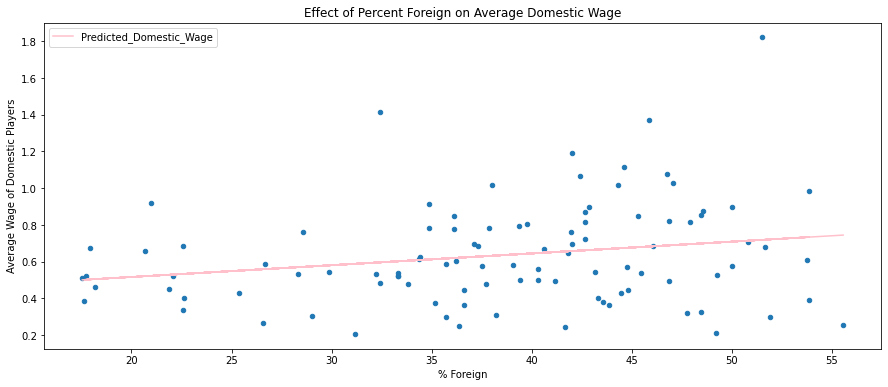

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
Lastplot = TwoSEXc.plot(ax=ax, kind="scatter", x="% Foreign", y="Yearly Wage", title = "Effect of Percent Foreign on Average Domestic Wage", ylabel = "Average Wage of Domestic Players")
TwoSEXc.plot(x="% Foreign", y="Predicted_Domestic_Wage", ax=ax, color = "pink")

As we can see, here it looks like having more foreign players on a team actually raises the average wage of domestic players. From the regression coefficient, it looks like a one percentage-point increase in the percentage of a team that is foreign increases the average wage of domestic players by £6254, which is a pretty large amount considering how low the wages of many domestic players are on most of the teams. This counters the idea that having more international players would depress domestic player wages. Of course, however, this estimate is not really causal. It may be that better teams have a greater percentage of their players that is foreign because they can afford to buy expensive foreign players, and those teams will generally be able to earn enough money to pay for the best domestic players too. Still, this provides a good argument against those that suggest that foreign players are depressing the earnings of local British players in the league.

#### Conclusion:

Having completed this analysis, it seems apparent that foreign players have a large effect on how much domestic players make in the UK. Looking at the first graph, we can tell that average wages are very important towards team performance, which reinforces the ability of teams to pay their players more due to merit payments and revenue. However, there's a lot of dispersion in average wages in the League, both across teams and specifically for foreign vs. domestic players. What's consistent across all teams is that domestic players make far less on average than foreign players, which suggests they do not capture as much of the value created by a team as their international colleagues. The difference in wages between foreign and domestic also depends a lot of the team, with no clear pattern. From the box and whisker plots, we can tell that domestic player wages are concentrated around the lower end of a team's distribution and and that the median and maximum wages for foreign players are most often a lot higher than those for domestic players. We can also tell from the time-series graphs that wages have evolved a lot over time for each team but that there has not been a clear pattern in how these have changed. From the ratio graphs, there was also a lot of dispersion in the difference between domestic and international wages, but this has not moved in any clear direction over time either. Finally, the last regression shows that having more international players, even if these players earn more than domestic, is associated with a higher average domestic player wage. It therefore seems that, although there hasn't been much of a clear pattern in how domestic and international wages have compared over time for the different teams in the league beyond the stark difference in the average wages the two groups make, having international players can actually be beneficial to domestic players. 

#### References:

BBC Newsround. (2017, August 13). How does the Premier League work? BBC News. Retrieved December 18, 2021, from https://www.bbc.co.uk/newsround/40891247

British Premier League (Ed.). (2021). Entertaining audiences. Premier League. Retrieved December 18, 2021, from https://www.premierleague.com/this-is-pl/the-fans/686489?articleId=686489

Canning, T. (2020, July 19). How the English Football Pyramid system works – step by step. Football in Berkshire. Retrieved December 18, 2021, from https://www.footballinbracknell.co.uk/features/in-depth/32961/english-football-pyramid-system-works/

Colubriale, J. (2013, November 20). Help or hindrance? The impact of foreign players on the Barclays Premier League in the 21st Century. Medium. Retrieved December 18, 2021, from https://medium.com/@joecolubriale/help-or-hindrance-the-impact-of-foreign-players-on-the-barclays-premier-league-in-the-21st-century-2898c90c1077

Dane, K. (2021, August 22). Top 10 most watched sports leagues in the world 2020. Sporting Free. Retrieved December 18, 2021, from https://www.sportingfree.com/top/most-watched-sports-leagues-world/

de Brauw, A. (2017, Fall). Does immigration reduce wages? Cato Institute. Retrieved December 18, 2021, from https://www.cato.org/cato-journal/fall-2017/does-immigration-reduce-wages

Poli, R., Ravenel, L., & Besson, R. (2017, February). Foreign players in football teams (CIES Football Observatory Monthly Report). CIES Football Observatory. https://football-observatory.com/IMG/pdf/mr12_eng.pdf

Safdar, S. (2019, May 12). How well do FIFA ratings predict actual results? Quant Econ Notes. Retrieved December 18, 2021, from https://notes.quantecon.org/submission/5cd8a7fab955b800107296ca

Salary Sport (Ed.). (2021). Football - team & player salaries - Premier League. Salary Sport. Retrieved December 18, 2021, from https://salarysport.com/football/#premier-league

Sky Sports (Ed.). (2021). Premier League table. Sky Sports. Retrieved December 18, 2021, from https://www.skysports.com/premier-league-table/2020

Startup Sapience. (2020, July 30). How does the English Premier League make money? Startup Sapience. Retrieved December 18, 2021, from https://startupsapience.medium.com/how-does-the-english-premier-league-make-money-d1d10e7963e0#:~:text=Apart%20from%20broadcasting%20revenues%2C%20the,shared%20equally%20amongst%20the%20clubs.

Statista. (2021). Premier League and Championship clubs' average revenues in 2019, by stream [Map]. Statista. https://www.statista.com/statistics/1022329/premier-league-and-chapmionship-clubs-average-revenues/
